In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt

In [2]:
# Get stock data from Yahoo Finance
def get_stock_data(symbol, start_date, end_date, interval='1m'):
    stock_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    plt.title(f'{symbol} Close Price - Interval: {interval}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return stock_data.index, stock_data['Adj Close'].values.reshape(-1, 1)


In [3]:
# Create sequences for training
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [4]:
# plot actual vs. predicted values
def plot_predictions_with_dates(dates, actual, predicted, title):
    plt.figure(figsize=(10, 6))
    
    # Ensure 'dates' has the correct length and frequency for your predictions
    if len(dates) > len(actual):
        dates = dates[:len(actual)]
    
    plt.plot(dates, actual.flatten(), label='Actual') 
    plt.plot(dates, predicted.flatten(), label='Predicted')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


In [5]:
# Define stock symbols and sequence length
symbols = ['AAPL', 'GOOGL', 'TSLA', 'AMD']
sequence_length_short = 3 

In [6]:
# Evaluate model performance
def evaluate_model_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")


[*********************100%%**********************]  1 of 1 completed


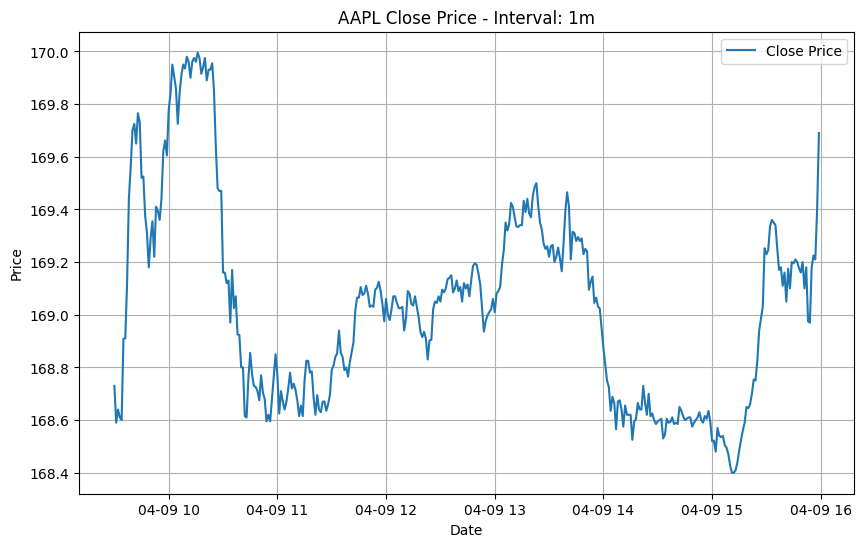



Epoch 1/100

9/9 - 3s - loss: 0.2243 - val_loss: 0.0051 - 3s/epoch - 322ms/step
Epoch 2/100
9/9 - 0s - loss: 0.1474 - val_loss: 0.0012 - 48ms/epoch - 5ms/step
Epoch 3/100
9/9 - 0s - loss: 0.0669 - val_loss: 0.0253 - 43ms/epoch - 5ms/step
Epoch 4/100
9/9 - 0s - loss: 0.0259 - val_loss: 0.0757 - 44ms/epoch - 5ms/step
Epoch 5/100
9/9 - 0s - loss: 0.0269 - val_loss: 0.0517 - 46ms/epoch - 5ms/step
Epoch 6/100
9/9 - 0s - loss: 0.0210 - val_loss: 0.0306 - 47ms/epoch - 5ms/step
Epoch 7/100
9/9 - 0s - loss: 0.0195 - val_loss: 0.0298 - 53ms/epoch - 6ms/step
3/3 [==============================] - 0s 2ms/step


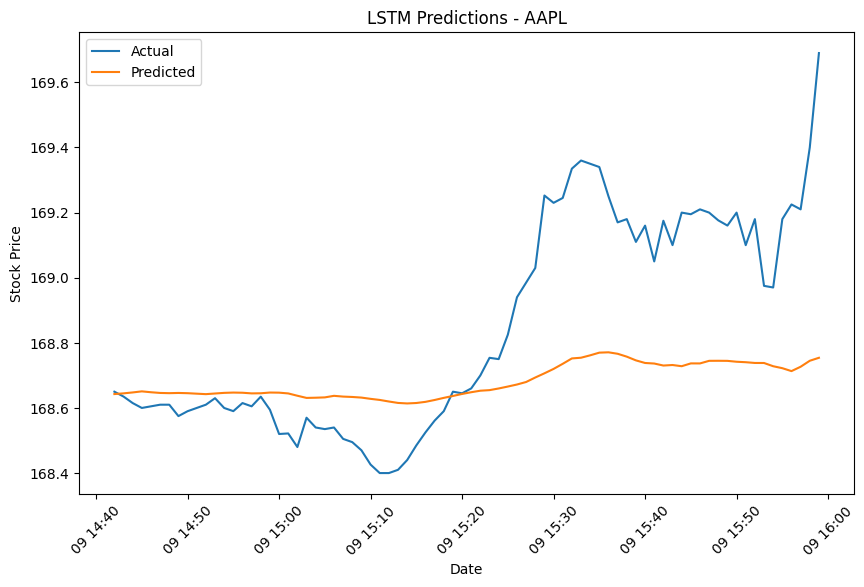

Evaluating LSTM Performance for AAPL
Mean Squared Error (MSE): 0.1043300980893083
Root Mean Squared Error (RMSE): 0.32300169982417787
Mean Absolute Error (MAE): 0.24563246506911057
R^2 Score: 0.0210283209474037


[*********************100%%**********************]  1 of 1 completed


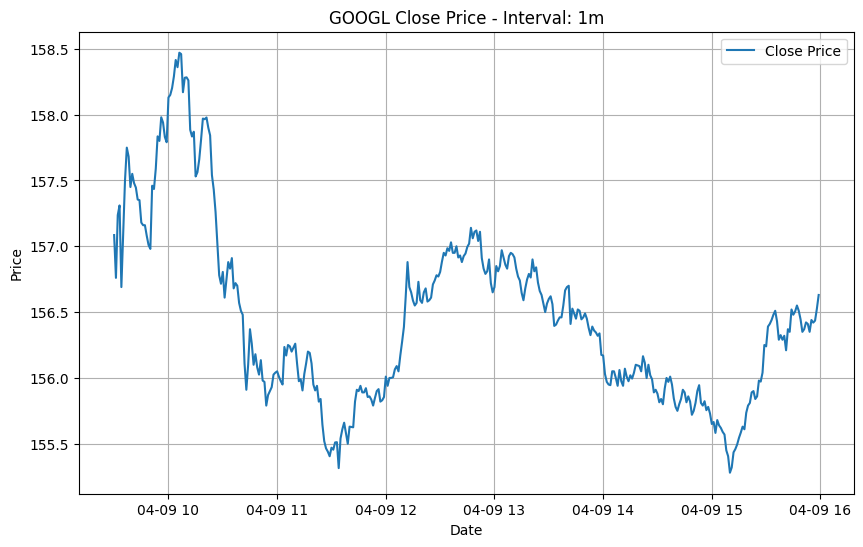

Epoch 1/100
9/9 - 3s - loss: 0.1917 - val_loss: 0.0207 - 3s/epoch - 284ms/step
Epoch 2/100
9/9 - 0s - loss: 0.1228 - val_loss: 0.0026 - 48ms/epoch - 5ms/step
Epoch 3/100
9/9 - 0s - loss: 0.0570 - val_loss: 0.0110 - 44ms/epoch - 5ms/step
Epoch 4/100
9/9 - 0s - loss: 0.0285 - val_loss: 0.0484 - 45ms/epoch - 5ms/step
Epoch 5/100
9/9 - 0s - loss: 0.0262 - val_loss: 0.0321 - 44ms/epoch - 5ms/step
Epoch 6/100
9/9 - 0s - loss: 0.0209 - val_loss: 0.0145 - 44ms/epoch - 5ms/step
Epoch 7/100
9/9 - 0s - loss: 0.0182 - val_loss: 0.0128 - 50ms/epoch - 6ms/step
3/3 [==============================] - 0s 2ms/step


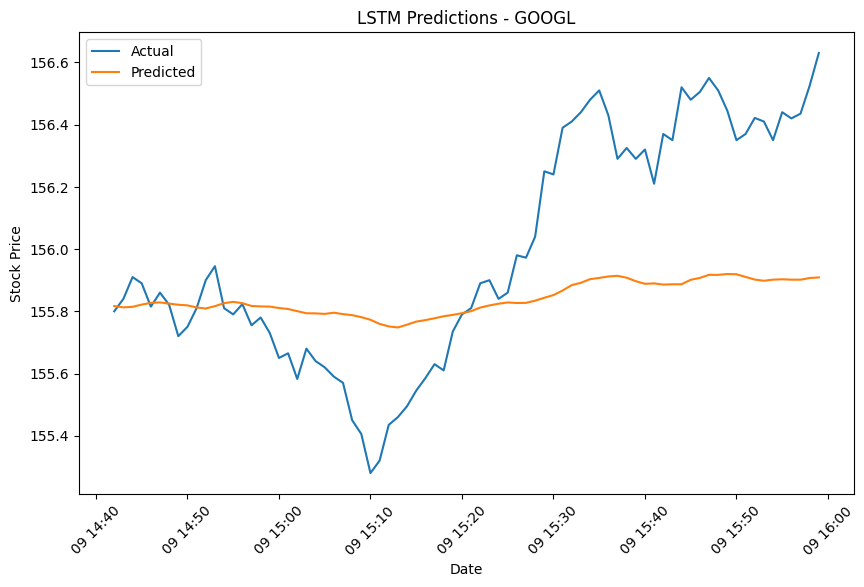

[*********************100%%**********************]  1 of 1 completed

Evaluating LSTM Performance for GOOGL
Mean Squared Error (MSE): 0.12611481100499916
Root Mean Squared Error (RMSE): 0.3551264718448896
Mean Absolute Error (MAE): 0.2837213369516226
R^2 Score: 0.07596230360057554


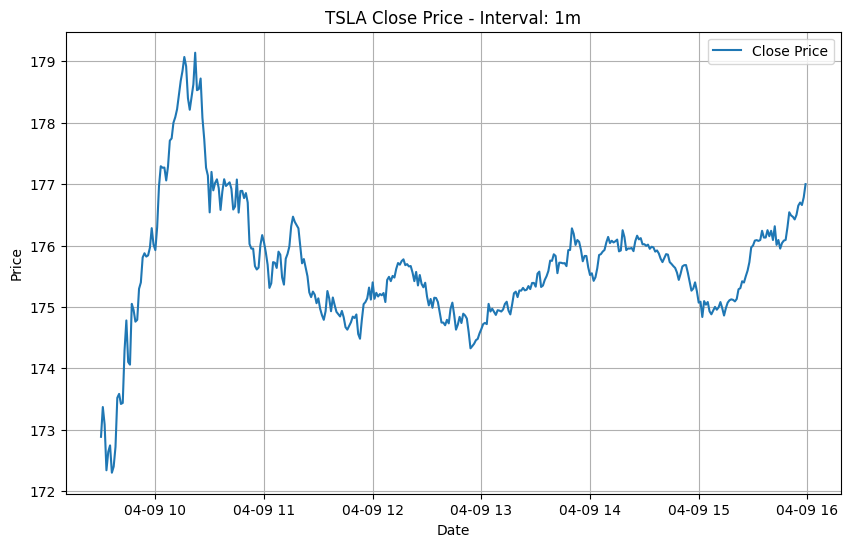

Epoch 1/100
9/9 - 3s - loss: 0.2257 - val_loss: 0.1961 - 3s/epoch - 283ms/step
Epoch 2/100
9/9 - 0s - loss: 0.1452 - val_loss: 0.1031 - 55ms/epoch - 6ms/step
Epoch 3/100
9/9 - 0s - loss: 0.0657 - val_loss: 0.0199 - 49ms/epoch - 5ms/step
Epoch 4/100
9/9 - 0s - loss: 0.0180 - val_loss: 0.0032 - 46ms/epoch - 5ms/step
Epoch 5/100
9/9 - 0s - loss: 0.0208 - val_loss: 0.0011 - 46ms/epoch - 5ms/step
Epoch 6/100
9/9 - 0s - loss: 0.0151 - val_loss: 0.0025 - 44ms/epoch - 5ms/step
Epoch 7/100
9/9 - 0s - loss: 0.0151 - val_loss: 0.0021 - 44ms/epoch - 5ms/step
Epoch 8/100
9/9 - 0s - loss: 0.0118 - val_loss: 3.8486e-04 - 46ms/epoch - 5ms/step
Epoch 9/100
9/9 - 0s - loss: 0.0104 - val_loss: 7.8733e-04 - 45ms/epoch - 5ms/step
Epoch 10/100
9/9 - 0s - loss: 0.0089 - val_loss: 2.7146e-04 - 46ms/epoch - 5ms/step
Epoch 11/100
9/9 - 0s - loss: 0.0060 - val_loss: 3.8110e-04 - 43ms/epoch - 5ms/step
Epoch 12/100
9/9 - 0s - loss: 0.0054 - val_loss: 2.5972e-04 - 44ms/epoch - 5ms/step
Epoch 13/100
9/9 - 0s - loss:

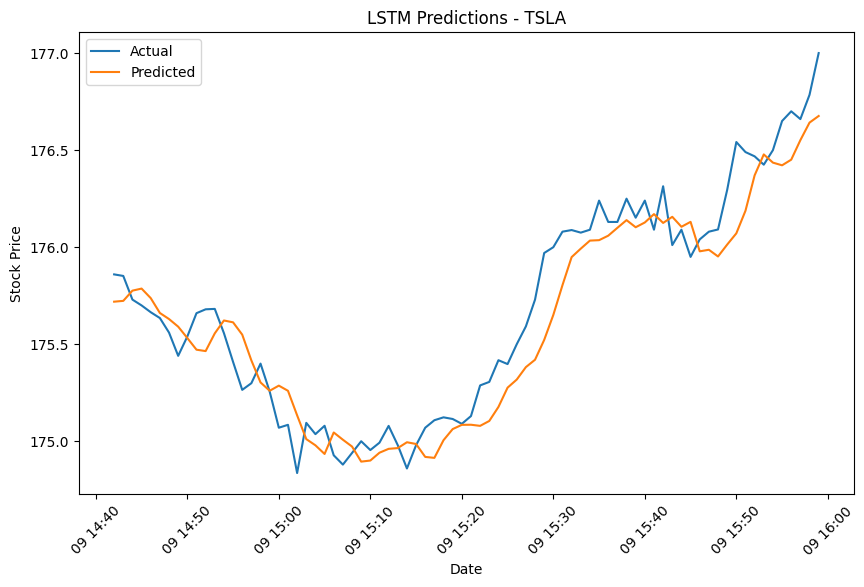

Evaluating LSTM Performance for TSLA
Mean Squared Error (MSE): 0.02953393554661232
Root Mean Squared Error (RMSE): 0.17185440217408549
Mean Absolute Error (MAE): 0.1405340341421274
R^2 Score: 0.9055436415230058


[*********************100%%**********************]  1 of 1 completed


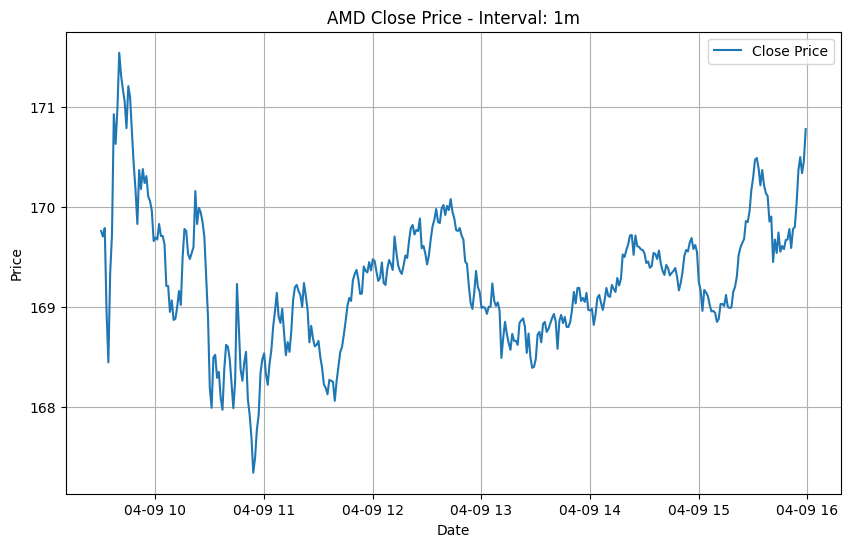

Epoch 1/100
9/9 - 2s - loss: 0.1777 - val_loss: 0.1687 - 2s/epoch - 276ms/step
Epoch 2/100
9/9 - 0s - loss: 0.1113 - val_loss: 0.0833 - 45ms/epoch - 5ms/step
Epoch 3/100
9/9 - 0s - loss: 0.0451 - val_loss: 0.0110 - 45ms/epoch - 5ms/step
Epoch 4/100
9/9 - 0s - loss: 0.0186 - val_loss: 0.0036 - 45ms/epoch - 5ms/step
Epoch 5/100
9/9 - 0s - loss: 0.0184 - val_loss: 0.0015 - 47ms/epoch - 5ms/step
Epoch 6/100
9/9 - 0s - loss: 0.0147 - val_loss: 0.0057 - 46ms/epoch - 5ms/step
Epoch 7/100
9/9 - 0s - loss: 0.0143 - val_loss: 0.0035 - 46ms/epoch - 5ms/step
Epoch 8/100
9/9 - 0s - loss: 0.0136 - val_loss: 8.4947e-04 - 47ms/epoch - 5ms/step
Epoch 9/100
9/9 - 0s - loss: 0.0111 - val_loss: 0.0020 - 45ms/epoch - 5ms/step
Epoch 10/100
9/9 - 0s - loss: 0.0107 - val_loss: 0.0013 - 45ms/epoch - 5ms/step
Epoch 11/100
9/9 - 0s - loss: 0.0095 - val_loss: 0.0012 - 44ms/epoch - 5ms/step
Epoch 12/100
9/9 - 0s - loss: 0.0079 - val_loss: 8.9000e-04 - 46ms/epoch - 5ms/step
Epoch 13/100
9/9 - 0s - loss: 0.0078 - va

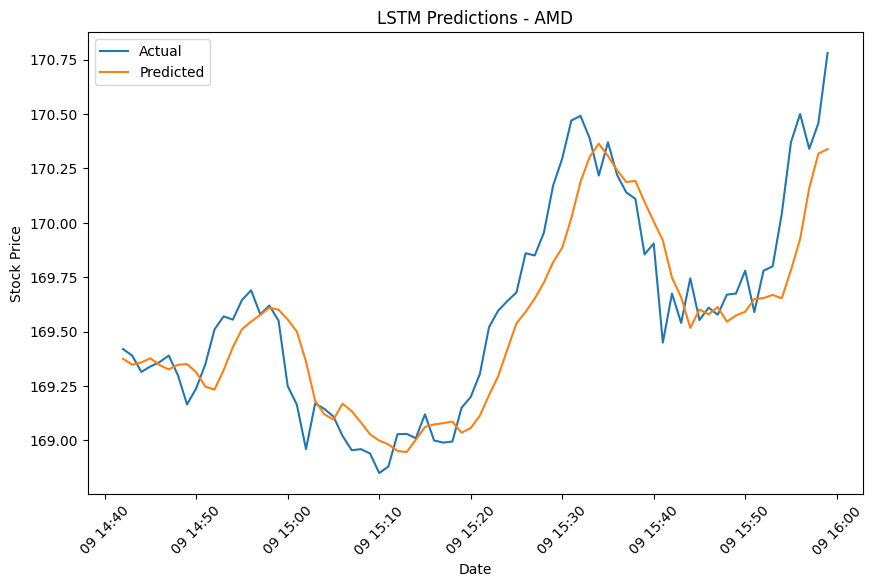

Evaluating LSTM Performance for AMD
Mean Squared Error (MSE): 0.04400937585160086
Root Mean Squared Error (RMSE): 0.20978411725295332
Mean Absolute Error (MAE): 0.16009325858874052
R^2 Score: 0.8025784337958284


In [7]:
# Train and evaluate LSTM models for each stock symbol
for symbol in symbols:
    dates, data_short = get_stock_data(symbol, start_date='2024-04-09', end_date='2024-04-10', interval='1m')
    
    data = data_short
    sequence_length = sequence_length_short

    # Normalize the data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Create sequences and targets
    X, y = create_sequences(data_scaled, sequence_length)
    
    # Split the data into training and testing sets
    split_ratio = 0.8
    split_index = int(split_ratio * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Build the LSTM model with dropout for regularization
    lstm_model = Sequential([
        LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
        Dropout(0.2),  # Add dropout with a 20% rate
        LSTM(units=50),
        Dropout(0.2),  # Another dropout layer for additional regularization
        Dense(units=1)
    ])
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Adjusted early stopping callback to be more sensitive to overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Train the LSTM model with the updated early stopping callback
    lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=2, callbacks=[early_stopping])
    
    # Predict on the test set with the LSTM model
    predictions_scaled_lstm = lstm_model.predict(X_test)
    predictions_lstm = scaler.inverse_transform(predictions_scaled_lstm)
    y_test_original = scaler.inverse_transform(y_test)
    
    # Plot the actual vs. predicted values   
    plot_predictions_with_dates(dates[split_index + sequence_length:], y_test_original, predictions_lstm, f'LSTM Predictions - {symbol}')
    
    # Evaluate LSTM model performance with additional metrics
    print(f'Evaluating LSTM Performance for {symbol}')
    evaluate_model_performance(y_test_original, predictions_lstm)